# 03: Explorative Data Analysis

## Warmup: Curse of Dimensionality

The uniform distribution $U[0,1]^d$ assigns equal probability density to vectors in the $d$-dimensional unit hypercube $[0,1]^d \subset \mathbb{R}^d$.

The following code cell samples pairs of vectors from that distribution $10.000$ times and plots the distribution of the distances between these vector pairs in a histogram.
There is one such plot for a couple of different choices for $d$.

> Based on these plots, argue for the following two statements about the curse of dimensionality from the lecture.
> 1. With increasing $d$, data become sparse.
> 2. With increasing $d$, distances lose meaning.

1. 
2. 

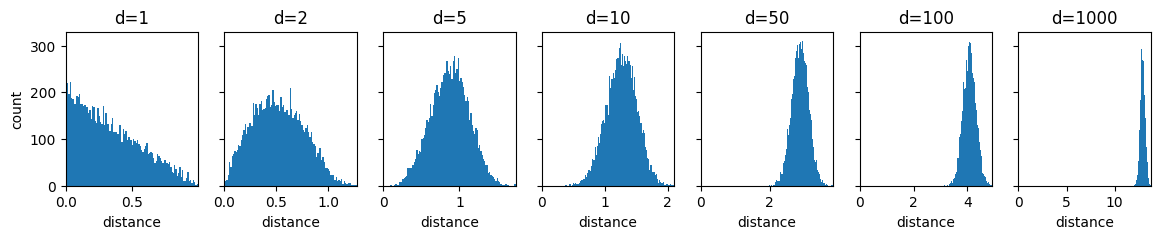

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dims = [1, 2, 5, 10, 50, 100, 1000]
fig, axs = plt.subplots(1, len(dims), figsize=(2*len(dims), 2), sharey="row")

for i, (dim, ax) in enumerate(zip(dims, axs)):
    num_iterations = 10000
    dists = []

    random_points1 = np.random.random((num_iterations, dim))
    random_points2 = np.random.random((num_iterations, dim))
    random_point_diffs = random_points1 - random_points2
    dists = np.linalg.norm(random_point_diffs, axis=1)

    ax.hist(dists, 100)
    ax.set_xlim(0, dists.max())
    ax.set_title(f"d={dim}")
    ax.set_xlabel("distance")
    if i == 0:
        ax.set_ylabel("count")

plt.show()

## PCA

Here we will build PCA step by step.

To have something to work with, we start by randomly generating some data points first.

> 1. How many points are there in X?
> 2. How many dimensions do the points in X have?

1. 
2. 

In [ ]:
# Generate 2D Gaussian blob
np.random.seed(0)
X = np.random.multivariate_normal(mean=[2, 0],
                                  cov=[[1, -1.5],
                                       [-1.5, 3]],
                                  size=10)

print(f"Shape of X: {X.shape}")

plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axis('equal')
plt.title("Original 2D Data")
plt.show()

The next cell just defines a function that lets us view the dimensionality-reducing projection of PCA, but doesn't apply it yet.

> 3. Run the following cell. (Don't get stuck on reading the code here.)

In [ ]:
def orthogonal_projection_1d(X, u):
    pass


def position_on_projection_vector(X_proj, u):
    pass


def plot_projection_2d(X, u, projection_func, ax):
    # get projection
    X_proj_1d = orthogonal_projection_1d(X, u)
    X_proj = projection_func(X, u)

    # show gridlines
    ax.grid(zorder=0)

    # show projection line
    vec_line = np.array([
        [u[0], -u[0]],  # xs
        [u[1], -u[1]]   # ys
    ]) * 1000
    ax.plot(vec_line[0], vec_line[1], color="purple", zorder=10)

    for xi, xi_proj in zip(X, X_proj):
        ax.plot([xi[0], xi_proj[0]], [xi[1], xi_proj[1]], color=(0, 0, 1), zorder=10)

    # show data points
    scatter_X = ax.scatter(X[:, 0], X[:, 1], color=(1, 0, 0), zorder=20)
    scatter_X_proj = ax.scatter(X_proj[:, 0], X_proj[:, 1], color=(0, 1, 0), zorder=20)

    # show projection vector
    shift_magnitude = 0.1
    vec_shift = np.array([-u[1], u[0]]) * shift_magnitude
    ax.annotate("", xytext=(vec_shift[0], vec_shift[1]), xy=(vec_shift[0]+u[0], vec_shift[1]+u[1]), arrowprops=dict(arrowstyle="->"), zorder=30)
    ax.text(vec_shift[0]+u[0], vec_shift[1]+u[1], r"$\mathbf{u}$")
    
    # set axis limits
    all_content = np.zeros((2*X.shape[0] + 1, 2))
    all_content[:X.shape[0]] = X
    all_content[X.shape[0]:2*X.shape[0]] = X_proj
    all_content[-1] = u
    xlim = [all_content[:, 0].min(), all_content[:, 0].max()]
    ylim = [all_content[:, 1].min(), all_content[:, 1].max()]
    padding = min([0.5, 0.1*(xlim[1]-xlim[0]), 0.1*(ylim[1]-ylim[0])])
    xlim[0] -= padding
    xlim[1] += padding
    ylim[0] -= padding
    ylim[1] += padding
    xlim[0] = min(xlim[0], ylim[0])
    xlim[1] = max(xlim[1], ylim[1])
    ylim[0] = min(xlim[0], ylim[0])
    ylim[1] = max(xlim[1], ylim[1])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # define annotations
    ax.set_title(r"Projection on $u=\binom{"+f"{u[0]:.2f}"+r"}{"+f"{u[1]:.2f}"+r"}$"+"\n"+r"$Var(X_{proj})=$"+f"{X_proj_1d.var():.2f}")
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.legend([scatter_X, scatter_X_proj], [r"$\mathbf{x}_n$", r"$\mathbf{x}_{n,proj}$"])

### Orthogonal Projection onto a Vector

We're starting with just the projection of data points onto a vector.

> 4. Implement the PCA projection from the lecture, which takes a data point $\mathbf{x}_i$ and a vector $\mathbf{u}$. (The notation is slightly different in the lecture slides.)

In [ ]:
def orthogonal_projection_1d(X, u):
    X_proj = []
    for x_i in X:
        X_proj.append(x_i)  # TODO: 4. replace x_i with its projection on u as taught in the lecture
    return np.array(X_proj)


u1 = np.array([1., 0.])
u2 = np.array([1., 1.])
u3 = np.array([2., 0.])
X_proj1 = orthogonal_projection_1d(X, u1)
X_proj2 = orthogonal_projection_1d(X, u2)
X_proj3 = orthogonal_projection_1d(X, u3)

print(f"u1 = {u1} -> projection variance = {X_proj1.var()}")
print(f"u2 = {u2} -> projection variance = {X_proj2.var()}")
print(f"u3 = {u3} -> projection variance = {X_proj3.var()}")

Correct output:

```raw
u1 = [1. 0.] -> projection variance = 0.6023364389424803
u2 = [1. 1.] -> projection variance = 0.42054013549497044
u3 = [2. 0.] -> projection variance = 2.4093457557699214
```

The projected points are 1-dimensional now. The following code moves them back into 2D space and plots the projection. We do this by simply scaling $\mathbf{u}$ by the projections per point.

> 5. Run the following cell. (Don't get stuck on reading the code here.)

In [ ]:
def scale_u_by_projection(X, u):
    X_proj = orthogonal_projection_1d(X, u)
    X_vecpos = []
    for x_i in X_proj:
        X_vecpos.append(x_i * u)
    return np.array(X_vecpos)


fig, axs = plt.subplots(1, 3, figsize=(21, 6))
plot_projection_2d(X, u1, scale_u_by_projection, axs[0])
plot_projection_2d(X, u2, scale_u_by_projection, axs[1])
plot_projection_2d(X, u3, scale_u_by_projection, axs[2])

As you can see, this is not a proper orthogonal projection onto $\mathbf{u}$. $\mathbf{u}_1$ and $\mathbf{u}_3$ should have the same results, because they are just scaled versions of each other.

This problem really shows in the variances after the projection. (You can find them in the output of your code from task 4.)

We could fix the projection for the general case by dividing the 1D projection values by the length of $\mathbf{u}$.

> 6. Why is this not a good solution, when we want to optimize $\mathbf{u}$ for the variance of the 1D projection values?
> 7. Which other solution does the lecture give for this problem? (Hint: What is $\mathbf{u}^T \mathbf{u}$ in the lecture?)

6. 
7. 

### Choosing $\mathbf{u}$

Let's look at a set of choices for $\mathbf{u}$, that meets the requirement from the lecture.

The following code uniformly samples unit vectors from the unit circle between $0$ and $180$ degrees. Then the points are projected onto each one of them.

> 8. Run the following cell. (Don't get stuck on reading the code here.)
> 9. What would the projections onto unit vectors with angles between $180$ and $360$ degrees look like compared to those shown below?

9. 

In [ ]:
def get_unit_vector_for_angle(theta):
    return np.array([np.cos(theta), np.sin(theta)])


# sample unit vectors with different rotations
thetas8 = np.linspace(0, np.pi, 8)

# plot sampled vectors
fig, axs = plt.subplots(1, 8, figsize=(18,2), sharey="row")
for theta, ax in zip(thetas8, axs):
    theta_vec = get_unit_vector_for_angle(theta)
    ax.annotate("", xytext=(0,0), xy=(theta_vec[0], theta_vec[1]), arrowprops=dict(arrowstyle="->"))
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_title(r"$\mathbf{u}"+r"=\binom{"+f"{theta_vec[0]:.2f}"+r"}{"+f"{theta_vec[1]:.2f}"+r"}$"+f"\n $\\theta$={np.degrees(theta):.2f} deg")
plt.show()

# plot projections
fig1, axs1 = plt.subplots(1, 4, figsize=(20,4))
fig2, axs2 = plt.subplots(1, 4, figsize=(20,4))

for theta, ax in zip(thetas8, [*axs1, *axs2]):
    theta_vec = get_unit_vector_for_angle(theta)
    plot_projection_2d(X, theta_vec, scale_u_by_projection, ax)
plt.show()

All of these vectors are candidates for our principle components, but which to choose?

We want to maximize the variance after the projection, so let's have a look at how the variance responds to differently rotated unit vectors.

> 10. Run the following cell. (Don't get stuck on reading the code here.)

Great! We can see in which direction $\mathbf{u}$ should point to maximize the variance after the projection. So we could just pick this as our solution. But this is not the algorithm taught in the lecture...

> 11. Name two shortcomings of this algorithm to finding principal components.

11. 

In [ ]:
thetas_many = np.linspace(0, np.pi, 180)
thetas_many_vars = [np.var(orthogonal_projection_1d(X, get_unit_vector_for_angle(t))) for t in thetas_many]

plt.plot(np.degrees(thetas_many), thetas_many_vars)
plt.xlabel('Projection Angle (degrees)')
plt.ylabel('Projected Variance')
plt.title('Variance Along Different Directions')
plt.show()

### Linear Algebra of Covariances

Let's speed this up!

To get there, let's first have a look at the covariance matrix of our data and what it means.

To illustrate, we start by manipulating our data to have unit variance, i.e. such that the covariance matrix is a unit/identity matrix (called "whitening").

Afterwards is where the interesting part will happen, which is why your task again is to simply:

> 10. Run the following cell. (Don't get stuck on reading the code here.)

In [ ]:
X_covariance = np.cov(X, rowvar=False)
X_eigvals, X_eigvecs = np.linalg.eig(X_covariance)
X_whitening_transform = X_eigvecs @ np.diag(1.0 / np.sqrt(X_eigvals)) @ X_eigvecs.T

X_whitened = (X - X.mean()) @ X_whitening_transform

print("Covariance matrix of whitened data:")
print(np.cov(X_whitened, rowvar=False))

plt.scatter(X_whitened[:, 0], X_whitened[:, 1])
plt.title("Whitened X")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

The whitened points are now evenly distributed around the center of the coordinate system, with no dominant direction.

Next we will see how the covariance matrix acts on these points $W$ to obtain our original unevenly distributed $X$.

> 11. Run the following cell. (Don't get stuck on reading the code here.)

The resulting plots show the transformation $W$ to $X$ step by step.

Notation:

Eigenvectors: $q_1 = \binom{q_{1,1}}{q_{1,2}}$ and $q_2 = \binom{q_{2,1}}{q_{2,2}}$, Eigenvalues: $\lambda_1$ and $\lambda_2$

Matrices of Eigenvectors and -values: 
$Q = \begin{bmatrix}
q_{1,1} & q_{2,1} \\
q_{1,2} & q_{2,2}
\end{bmatrix}$
,
$\Lambda = diag(\lambda_1, \lambda_2) =
\begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2
\end{bmatrix}$

Whitened data:
$W = \begin{bmatrix}
w_{1,1} & w_{2,1} & \cdots w_{n,1}\\
w_{1,2} & w_{2,2} & \cdots w_{n,2}
\end{bmatrix}$

> 12. What are the steps taken from one plot to the next? Assign these names of transformations to the plot numbers: "translation", "scaling", "rotation", "shearing" (Repetitions and omissions are allowed.)

12.

(1): no transformation yet, this is the starting point

(2): 

(3): 

(4): 

(5): 

In [ ]:
X_covariance = np.cov(X, rowvar=False)
X_eigvals, X_eigvecs = np.linalg.eig(X_covariance)

fig, axs = plt.subplots(1, 5, figsize=(15, 3))

axs[0].scatter(X_whitened[:, 0], X_whitened[:, 1])
axs[0].annotate("", xytext=(0,0), xy=(X_eigvecs[0, 0], X_eigvecs[0, 1]), arrowprops=dict(arrowstyle="->"))
axs[0].annotate("", xytext=(0,0), xy=(X_eigvecs[1, 0], X_eigvecs[1, 1]), arrowprops=dict(arrowstyle="->"))
axs[0].set_title("(1) $W$")
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")
axs[0].set_xlim(-2.5, 2.5)
axs[0].set_ylim(-2.5, 2.5)

X_whitened_in_eigvec_space = X_eigvecs.T @ X_whitened.T
X_eigvecs_in_eigvec_space = X_eigvecs.T @ X_eigvecs

axs[1].scatter(X_whitened_in_eigvec_space[0, :], X_whitened_in_eigvec_space[1, :])
axs[1].annotate("", xytext=(0,0), xy=(X_eigvecs_in_eigvec_space[0, 0], X_eigvecs_in_eigvec_space[1, 0]), arrowprops=dict(arrowstyle="->"))
axs[1].annotate("", xytext=(0,0), xy=(X_eigvecs_in_eigvec_space[0, 1], X_eigvecs_in_eigvec_space[1, 1]), arrowprops=dict(arrowstyle="->"))
axs[1].set_title("(2) $Q^TW$")
axs[1].set_xlabel("$x_1$")
axs[1].set_ylabel("$x_2$")
axs[1].set_xlim(-2.5, 2.5)
axs[1].set_ylim(-2.5, 2.5)

X_unwhitened_in_eigvec_space = np.diag(np.sqrt(X_eigvals)) @ X_whitened_in_eigvec_space
X_scaled_eigvecs_in_eigvec_space = np.diag(np.sqrt(X_eigvals)) @ X_eigvecs_in_eigvec_space

axs[2].scatter(X_unwhitened_in_eigvec_space[0, :], X_unwhitened_in_eigvec_space[1, :])
axs[2].annotate("", xytext=(0,0), xy=(X_scaled_eigvecs_in_eigvec_space[0, 0], X_scaled_eigvecs_in_eigvec_space[1, 0]), arrowprops=dict(arrowstyle="->"))
axs[2].annotate("", xytext=(0,0), xy=(X_scaled_eigvecs_in_eigvec_space[0, 1], X_scaled_eigvecs_in_eigvec_space[1, 1]), arrowprops=dict(arrowstyle="->"))
axs[2].set_title(r"(3) $\Lambda^{1/2}Q^TW$")
axs[2].set_xlabel("$x_1$")
axs[2].set_ylabel("$x_2$")
axs[2].set_xlim(-2.5, 2.5)
axs[2].set_ylim(-2.5, 2.5)

X_unwhitened = X_eigvecs @ X_unwhitened_in_eigvec_space
X_scaled_eigvecs = X_eigvecs @ X_scaled_eigvecs_in_eigvec_space

axs[3].scatter(X_unwhitened[0, :], X_unwhitened[1, :])
axs[3].annotate("", xytext=(0,0), xy=(X_scaled_eigvecs[0, 0], X_scaled_eigvecs[1, 0]), arrowprops=dict(arrowstyle="->"))
axs[3].annotate("", xytext=(0,0), xy=(X_scaled_eigvecs[0, 1], X_scaled_eigvecs[1, 1]), arrowprops=dict(arrowstyle="->"))
axs[3].set_title(r"(4) $Q\Lambda^{1/2}Q^TW$")
axs[3].set_xlabel("$x_1$")
axs[3].set_ylabel("$x_2$")
axs[3].set_xlim(-2.5, 2.5)
axs[3].set_ylim(-2.5, 2.5)

X_reconstructed = X_unwhitened + X.mean()

axs[4].scatter(X[:, 0], X[:, 1], s=80)
axs[4].scatter(X_reconstructed[0, :], X_reconstructed[1, :])
axs[4].set_title("(5) Reconstructed X on original X")
axs[4].set_xlabel("$x_1$")
axs[4].set_ylabel("$x_2$")
axs[4].legend(["Original", "Reconstructed"])

# print("Covariance matrix of original X:")
# print(np.cov(X, rowvar=False))
# print("Covariance matrix of reconstructed X:")
# print(np.cov(X_reconstructed.T, rowvar=False))

fig.tight_layout()
plt.show()

Maybe at this point you ask "Why does this have to be so complicated?" and "Can't we just multiply our whitened points $W$ with the covariance matrix of $X$?". After all, the Eigenvectors of a transformation matrix are supposed to be equal to the directions in which the matrix only stretches points and the Eigenvectors are supposed to be the magnitude of that stretch.

You can have a quick look at the output of the following cell to check that idea. It's not too far off, it's just that the scaling is not on point. This is why we have to take the square root of the Eigenvalues for a correct reconstruction.

> 13. Run the following cell. (Don't get stuck on reading the code here.)

In [ ]:
print(f"Eigenvalues: {X_eigvals}")

X_reconstructed_naive = (np.cov(X, rowvar=False) @ X_whitened.T) + X.mean()

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_reconstructed_naive[0, :], X_reconstructed_naive[1, :])
plt.title("Naively reconstructed X on original X")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(["Original", "Reconstructed"])
plt.show()

### Explicit Covariance-based Implementation

The next code cell has an implementation of PCA based on the eigendecomposition of the covariance matrix of the data.

> 14. Why don't we take the square root of the Eigenvalues here?
> 15. Why does the `pca_cov` function sort the Eigenvectors?

14. 
15. 

In [ ]:
def pca_cov(X):
    C = np.cov(X, rowvar=False)  # Covariance matrix
    vals, vecs = np.linalg.eig(C)  # Eigen decomposition of covariance matrix

    # Sort eigenvalues
    idx = np.argsort(vals)[::-1]
    vals = vals[idx]
    vecs = vecs[:, idx]

    return vecs


# don't get stuck reading the plotting part below
us_pca = pca_cov(X)

fig, axs = plt.subplots(1, len(us_pca[0]), figsize=(len(us_pca[0])*7, 6))
for dim in range(len(us_pca[0])):
    plot_projection_2d(X, us_pca[:, dim], scale_u_by_projection, axs[dim])
plt.show()

### SVD-based Implementation

Computing the entire covariance matrix in high dimensions can get inefficient and is not necessary.

The singular value decomposition is a "shortcut" we can take to obtain the Eigenvectors of the covariance matrix without explicit computation of the covariance matrix.

> 16. The SVD-based PCA needs to center the data first. Why is this not needed in the last version, that explicitly computes the covariances?

16. 

In [ ]:
def pca_svd(X):
    X_centered = X - np.mean(X, axis=0)
    _, _, Vt = np.linalg.svd(X_centered, full_matrices=False)
    return Vt


# don't get stuck reading the plotting part below
us_pca = pca_svd(X)

fig, axs = plt.subplots(1, len(us_pca[0]), figsize=(len(us_pca[0])*7, 6))
for dim in range(len(us_pca[0])):
    plot_projection_2d(X, us_pca[:, dim], scale_u_by_projection, axs[dim])
plt.show()

### Fraction of Explained Variance

> 17. How can the fraction of explained variance be used to determine how many principal components we should take from a given dataset, in order to preserve the bulk of the contained information?

17. 

## k-means

### Clustering

> 1. Is clustering a supervised or an unsupervised learning problem?
> 2. Improve the points in the `centroids` variable below, such that the clusters visually look like they capture the data better to you! Give it just one shot, no need for perfection.

1. 

In [ ]:
from sklearn.datasets import make_blobs

X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=0)

centroids = np.array([  # TODO: 2. these points seem a little off. Can you improve them?
    [-1.5, 6],
    [1.5, 2],
    [-1.5, 2]
])
labels = np.argmin(((X_blobs[:, None, :] - centroids[None, :, :])**2).sum(axis=2), axis=1)

plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title("Data Points")
plt.show()

### Optimization Target

Let's have a look at whether your new cluster definition is better that the one given. For that, we will have to define what makes a good clustering.

> 3. Implement the target function from the lecture in `clustering_cost`!

In [ ]:
def clustering_cost(X, centroids, labels):
    pass  # TODO: 3. implement

# Given centroids from the previous task
centroids_1 = np.array([[-1.5, 4], [1.5, 2], [-1.5, 2]])
labels_1 = np.argmin(((X_blobs[:, None, :] - centroids_1[None, :, :])**2).sum(axis=2), axis=1)

cost_1 = clustering_cost(X_blobs, centroids_1, labels_1)
print(f"Cost of given centroids: {cost_1:.2f}")
cost = clustering_cost(X_blobs, centroids, labels)
print(f"Cost of improved centroids: {cost:.2f}")

> 4. The defined points are called `centroids` in the code, but that is not correct. Why are they not actual centroids?

4. 

### Lloyd's Algorithm

> 5. How are the clusters initialized in the following implementation of k-means? Was it the same in the lecture?
> 6. Look up the k-means documentation of sklearn. What other options are there for initialization?
> 7. Complete the following implementation of the k-means clustering algorithm from the lecture! You just need to add a single function call for each of the question marks.

5. 
6. 

In [ ]:
def kmeans(X, k=3, n_iter=10):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(n_iter):
        labels = ?(((X[:, None, :] - centroids[None, :, :])**2).sum(axis=2), axis=1)  # TODO: 7. complete (insert a function) at the question mark
        centroids = np.array([X[labels == j].? for j in range(k)])  # TODO: 7. complete (insert a function) at the question mark
    
    return centroids, labels

centroids, labels = kmeans(X_blobs, k=3, n_iter=10)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100)
plt.title("k-Means Result")
plt.show()